<a href="https://colab.research.google.com/github/albertocino/python-ml-course/blob/master/ML_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CARGA de datos a través de la función read_csv**

pip install --upgrade pandas as pd

pip install 'pandas==1.1.0'



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import sklearn
import scipy.stats as sp
import math

# ***Funcion cargar desde directorios***

In [ ]:
#mainpath = "C://Users/dkxeh3f/Desktop/python-ml-course-master/datasets"
#filename = "titanic/titanic3.csv"
#fullpath = os.path.join(mainpath, filename)

In [ ]:
data_columns = pd.read_csv("Customer Churn Columns.csv")

In [ ]:
data_columns.columns.values

array(['Column_Names'], dtype=object)

In [ ]:
data_columns_cols = data_columns['Column_Names'].tolist()
data_columns_cols

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U']

In [ ]:
data1 = pd.read_csv("Customer Churn Model.txt",header=0,names=data_columns_cols)

In [ ]:
data1.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
data1.columns.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U'], dtype=object)

In [ ]:
data = pd.read_csv("titanic3.csv")

In [ ]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# ***DATA PROFILE***

In [ ]:
data = pd.read_csv("Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

#***MISSING VALUES***

In [ ]:
data = pd.read_csv("titanic3.csv")
data1 = data
data1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
data1.shape

(1309, 14)

In [ ]:
pd.isnull(data1["body"])

0        True
1        True
2        True
3       False
4        True
        ...  
1304    False
1305     True
1306    False
1307     True
1308     True
Name: body, Length: 1309, dtype: bool

In [ ]:
pd.isnull(data1["body"]).values.ravel().sum() #te cuenta todos los NaN de la variable seleccionada


1188

In [ ]:
data1["body"].count() #te cuenta los valores (que no sean NaN)

121

In [ ]:
a = pd.isnull(data1["body"]).values.ravel().sum()
b = data1["body"].count()
print ("%.2f%%" % (100 * (a/(a+b)))) # % NaN del la variable analizada
# %.0f stands for "print a float with 0 decimal places"
# %% prints a literal %.

90.76%




> **Eliminar Filas**


In [ ]:
data1.dropna(axis=0, how="all") #"all" borra las filas con todas las var = NaN. "any" borra las filas con al menos 1 NaN en sus var

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN




> **Computar Missing Values**


In [ ]:
data2 = data
data2.fillna(0) #rellenar los NaN con 0

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,0,C,0,328.0,0
1305,3,0,"Zabour, Miss. Thamine",female,0.0000,1,0,2665,14.4542,0,C,0,0.0,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,0,C,0,304.0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,0,C,0,0.0,0


In [ ]:
data3 = data
data3["home.dest"] = data3["home.dest"].fillna("Unknw")
data3["boat"] = data3["boat"].fillna(0)
data3["age"] = data3["age"].fillna(data3["age"].mean()) #rellena los NaN de la var seleccionada con la media. extra = .median() . mode()
data3["cabin"] = data3["cabin"].fillna(method="ffill") #rellena los NaN de var seleccionada con su inmediato superior "backfill"inmediato inferior

In [ ]:
data3

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,0,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,0,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,F38,C,0,328.0,Unknw
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,F38,C,0,NaN,Unknw
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,F38,C,0,304.0,Unknw
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,F38,C,0,NaN,Unknw


# ***CREATE VARIABLES DUMMY***

In [ ]:
def CreateDummies (df, var1, var2):
  dummy_var1 = pd.get_dummies(df[var1],prefix=var1)
  dummy_var2 = pd.get_dummies(df[var2],prefix=var2)
  df = df.drop(var1, axis=1)
  df = df.drop(var2, axis=1)
  df = pd.concat([df, dummy_var1], axis=1)
  df = pd.concat([df, dummy_var2], axis=1)
  return df

In [ ]:
CreateDummies (data, "sex", "embarked")

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,2,NaN,"St Louis, MO",1,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,NaN,328.0,NaN,1,0,1,0,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,NaN,NaN,NaN,1,0,1,0,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,NaN,304.0,NaN,0,1,1,0,0
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,NaN,NaN,NaN,0,1,1,0,0


# ***PLOTS & DATA DISPLAY***

In [ ]:
data_scatterplot = pd.read_csv("Customer Churn Model.txt")
data_scatterplot.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


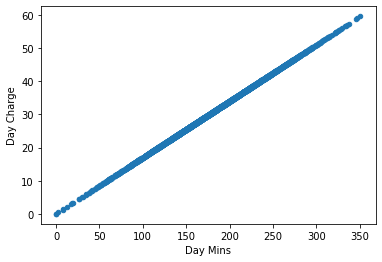

In [ ]:
data_scatterplot.plot(kind = "scatter", x = "Day Mins", y = "Day Charge")



> ***SubPlots***



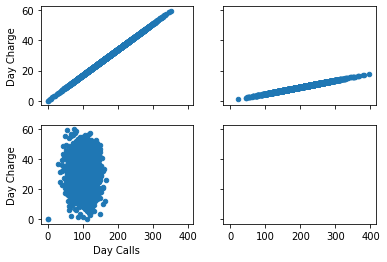

In [ ]:
figure, axs = plt.subplots(2,2,sharex=True, sharey=True)
data_scatterplot.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data_scatterplot.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data_scatterplot.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])


> ***Histogramas de frecuencias***



Text(0.5, 0, 'Número de llamadas al día')

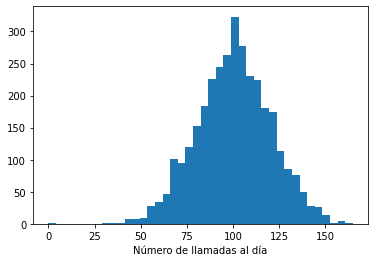

In [ ]:
plt.hist(data_scatterplot["Day Calls"], bins=40)
plt.xlabel("Número de llamadas al día")

# ***DATA WRANGLING***





> **Extraer columnas del dataset**



In [ ]:
data_wrang = pd.read_csv("Customer Churn Model.txt")
data_wrang.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
undesired_cols = ["Account Length", "Int'l Plan", "Intl Mins"]
all_cols_list = data_wrang.columns.values.tolist()
sublist = [x for x in all_cols_list if x not in undesired_cols]
subset = data_wrang[sublist]
subset

,State,Area Code,Phone,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,3,2.70,1,False.
1,OH,415,371-7191,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,3,3.70,1,False.
2,NJ,415,358-1921,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,5,3.29,0,False.
3,OH,408,375-9999,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,7,1.78,2,False.
4,OK,415,330-6626,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,414-4276,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,6,2.67,2,False.
3329,WV,415,370-3271,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,4,2.59,3,False.
3330,RI,510,328-8230,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,6,3.81,2,False.
3331,CT,510,364-6381,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,10,1.35,2,False.


In [ ]:
data_wrang[:10]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.




> **Filtering**



In [ ]:
dataw1 = data_wrang[data_wrang["State"]=="NY"] #filtro con var = NY
dataw1.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,77.1,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,217.5,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
182,NY,67,408,405-2888,no,yes,36,115.6,111,19.65,237.7,94,20.20,169.9,103,7.65,9.9,12,2.67,2,False.
186,NY,106,408,422-1471,no,no,0,158.7,74,26.98,64.3,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False.


In [ ]:
dataw2 = data_wrang[(data_wrang["Day Mins"]>300) & (data_wrang["State"] == "NY")] #filtros con var1 >300 AND var2=NY.
dataw2

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [ ]:
dataw2 = data_wrang[(data_wrang["Day Mins"]>300) | (data_wrang["State"] == "NY")] #filtros con var1 >300 OR var2=NY.
dataw2

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,181.0,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,77.1,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,217.5,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,188.6,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,198.1,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,163.7,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.
3310,NY,94,415,363-1123,no,no,0,190.4,91,32.37,92.0,107,7.82,224.8,108,10.12,13.6,17,3.67,2,False.


In [ ]:
dataw3 = data_wrang[["Eve Calls", "State"]][3000:] #filtrar por columnas y filas
dataw3

,Eve Calls,State
3000,86,NJ
3001,108,IL
3002,79,WA
3003,95,WV
3004,83,RI
...,...,...
3328,126,AZ
3329,55,WV
3330,58,RI
3331,84,CT


In [ ]:
dataw4 = data_wrang.iloc[3:10,[2,5,6]] #filtro por índice de filas y columnas
dataw4

,Area Code,VMail Plan,VMail Message
3,408,no,0
4,415,no,0
5,510,no,0
6,510,yes,24
7,415,no,0
8,408,no,0
9,415,yes,37


In [ ]:
dataw4 = data_wrang.loc[3:10,["Area Code", "VMail Message"]] #filtro por índice de filas y columnas por nombre
dataw4

,Area Code,VMail Message
3,408,0
4,415,0
5,510,0
6,510,24
7,415,0
8,408,0
9,415,37
10,415,0




> **Nuevas Columnas**



In [ ]:
data_create_cols = data

In [ ]:
data_create_cols["Total Mins"] = data_create_cols["Day Mins"] + data_create_cols["Eve Mins"] + data_create_cols["Night Mins"]
data_create_cols.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,707.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,611.5
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,527.2
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,558.2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,501.9


# ***GENERACIÓN ALEATORIA DE NÚMEROS***

In [ ]:
np.random.random()  #genera un float entre 0 y 1

0.19313701063639066

In [ ]:
def random_int_list (n, a, b):  # devuelve un array de n num enteros entre a y b
  x = []
  for i in range(n):
    x.append(np.random.randint(a,b))
  return x

In [ ]:
random_int_list (20, 0, 30)

[23, 9, 22, 20, 6, 17, 25, 24, 8, 28, 19, 27, 10, 10, 25, 12, 16, 13, 8, 20]

In [ ]:
for i in range(10):
  print (random.randrange(0,100, 7))  #devuelve 10 valores de 0 a 100 en múltiplos de 7

35
63
21
35
0
70
91
84
7
98




> **Shuffling**



In [ ]:
a = np.arange(100)  #devuelve un array con valores desde 0 a 100
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
np.random.shuffle(a)  #ordena aleatoriamente
a

array([46, 25, 42, 89, 90, 47, 65, 78, 64, 55, 27, 54, 41, 17, 43, 86, 72,
       84,  1, 75, 93, 16, 59, 30, 18, 36, 31, 81, 80, 79, 49, 11,  7, 51,
       13, 76, 94, 63, 85, 83, 77,  3, 66, 88,  4, 56, 21, 67, 33, 34, 53,
       91, 15, 71, 45, 92,  5, 40, 68, 37, 12,  0, 74, 44, 58,  8, 69, 28,
       26, 61, 95, 52, 50, 57, 60, 20, 98, 96, 14, 97, 62,  9, 39, 73,  6,
       19, 48, 24, 22, 32, 82, 38, 29, 99,  2, 70, 10, 23, 35, 87])

In [ ]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,707.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,611.5
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,527.2
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,558.2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,501.9


In [ ]:
len(data) #devuelve el nro de filas del dataset

3333

In [ ]:
for i in range(3):
  print (data.loc[[np.random.choice(len(data))]])

     State  Account Length  Area Code  ... CustServ Calls  Churn? Total Mins
1838    IA               1        408  ...              1  False.      570.7

[1 rows x 22 columns]
     State  Account Length  Area Code  ... CustServ Calls Churn? Total Mins
2213    TX              98        415  ...              0  True.      717.7

[1 rows x 22 columns]
    State  Account Length  Area Code  ... CustServ Calls  Churn? Total Mins
202    MD              97        415  ...              3  False.      642.5

[1 rows x 22 columns]




> **Seed**



In [ ]:
np.random.seed(2018)  #genera la semilla para poder replicar otros ejemplos con generación aleatoria
for i in range(5):
  print (np.random.random())

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


# ***FUNCIONES DE DISTRIBUCIÓN***

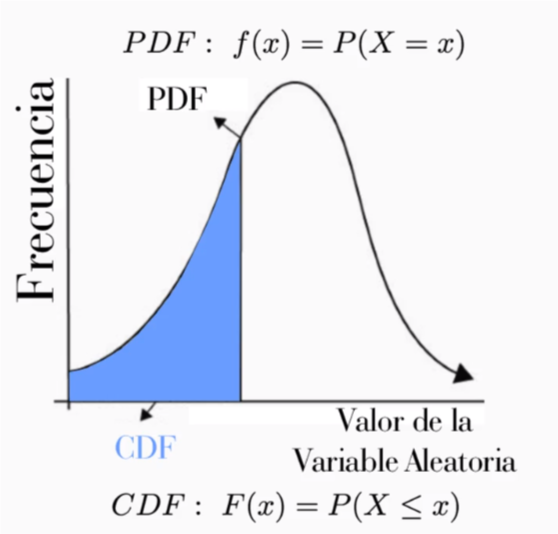

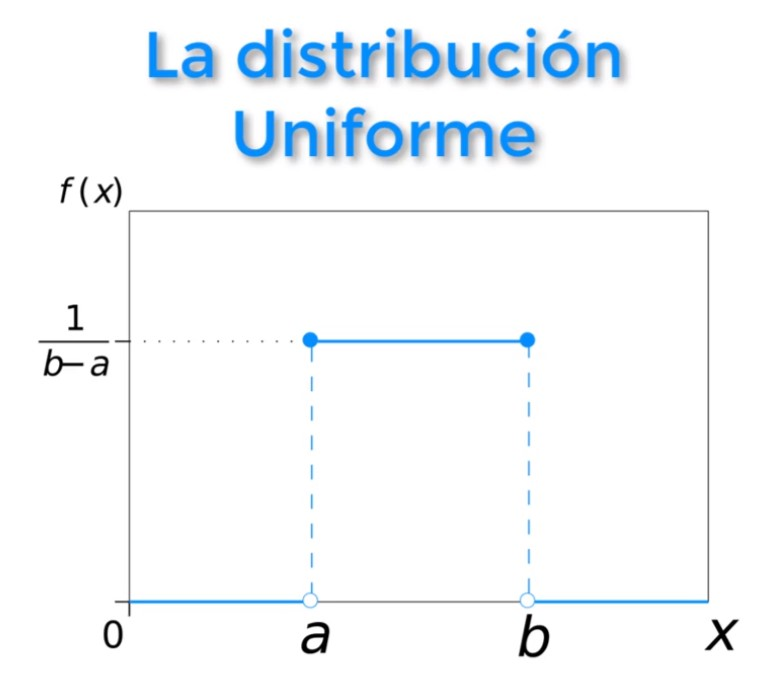



> **Distribución Uniforme**



In [ ]:
a = 1
b = 100
n = 10000
data_distrib = np.random.uniform(a, b, n)

(array([1020.,  991.,  988.,  993., 1030.,  983., 1028.,  937., 1034.,
         996.]),
 array([ 1.0141031 , 10.91198525, 20.8098674 , 30.70774954, 40.60563169,
        50.50351384, 60.40139599, 70.29927813, 80.19716028, 90.09504243,
        99.99292457]),
 <a list of 10 Patch objects>)

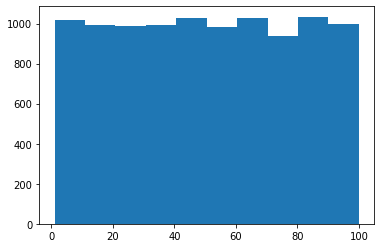

In [ ]:
plt.hist(data_distrib)



> **Distribución Normal**



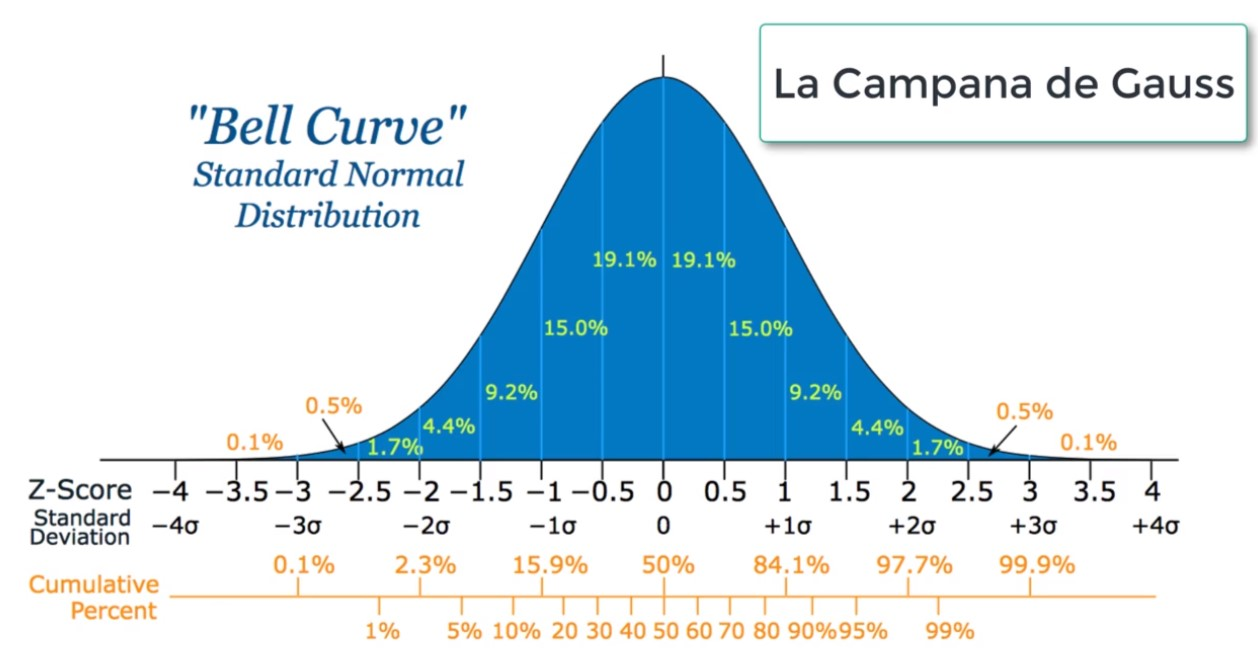

(array([1.000e+00, 1.100e+01, 1.370e+02, 7.250e+02, 2.010e+03, 3.053e+03,
        2.545e+03, 1.168e+03, 3.240e+02, 2.600e+01]),
 array([-5.84486578, -3.85426566, -1.86366553,  0.12693459,  2.11753472,
         4.10813485,  6.09873497,  8.0893351 , 10.07993522, 12.07053535,
        14.06113547]),
 <a list of 10 Patch objects>)

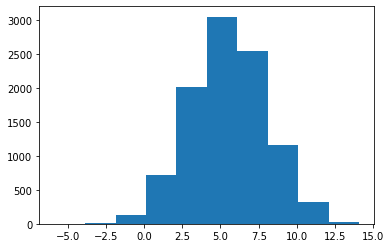

In [ ]:
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
data_normal = mu + sd * Z  # Z = (X-mu)/sd  -> N(0,1), X = mu + sd*Z
plt.hist(data_normal)

In [ ]:
data_normal1 = np.random.rand(2,4)
data_normal1

array([[0.30959431, 0.07543858, 0.5053441 , 0.32785408],
       [0.37151143, 0.65119255, 0.2324788 , 0.39002938]])

In [ ]:
mu = 20
std = 3
data_ND = sp.norm(mu, std)  #generamos la ND con mu y std dadas
data_ND

In [ ]:
PDF_data_ND = data_ND.pdf(20) #devuelve la PDF de la ND dada
PDF_data_ND

0.1329807601338109

In [ ]:
CDF_data_ND = data_ND.cdf(20) #devuelve la CDF de la ND dada
CDF_data_ND

0.5

# ***LA SIMULACIÓN DE MONTECARLO***

In [ ]:
def pi_montecarlo (n, n_exp):
  pi_avrg = 0
  pi_value_list = []
  for i in range(n_exp):
    value = 0
    x = np.random.uniform(0,1,n).tolist()
    y = np.random.uniform(0,1,n).tolist()
    for j in range(n):
      z = np.sqrt(x[j]*x[j] + y[j]*y[j])
      if z<=1:
        value +=1
    float_value = float(value)
    pi_value = float_value * 4/n
    pi_value_list.append(pi_value)
    pi_avrg += pi_value
  pi = pi_avrg / n_exp
  fig = plt.plot(pi_value_list)
  return(pi, fig)

(3.1430459999999996, [<matplotlib.lines.Line2D at 0x7f516e809978>])

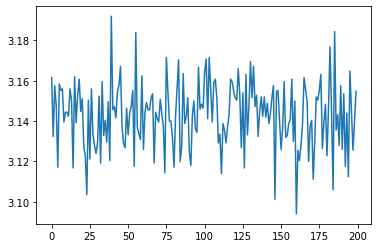

In [ ]:
pi_montecarlo (10000,200)

# ***DUMMY DATASETS***

In [ ]:
n = 1000000
dummy_df = pd.DataFrame(
    {
        "A" : np.random.randn(n),
        "B" : 1.5 + 2.5 * np.random.randn(n),
        "C" : np.random.uniform(5, 32, n)
    } 
)

In [ ]:
dummy_df.head()

,A,B,C
0,0.574423,5.267302,26.323430
1,-0.041778,-2.902951,17.668785
2,-0.778655,-3.412202,13.880758
3,-0.096789,0.436806,25.448098
4,-1.662235,0.916603,16.480740


In [ ]:
dummy_df.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.001783,1.502457,18.509026
std,1.001658,2.501669,7.797709
min,-4.687536,-9.888482,5.000014
25%,-0.674884,-0.188723,11.750146
50%,0.001816,1.503898,18.507737
75%,0.677710,3.190156,25.264504
max,4.711754,13.780864,31.999991


(array([47248., 47853., 47465., 47813., 47665., 47845., 47434., 47367.,
        47610., 47573., 47570., 47694., 47453., 47451., 47518., 47881.,
        47339., 47538., 48054., 47675., 47954.]),
 array([ 5.00001363,  6.28572682,  7.57144001,  8.8571532 , 10.14286639,
        11.42857958, 12.71429276, 14.00000595, 15.28571914, 16.57143233,
        17.85714552, 19.14285871, 20.4285719 , 21.71428508, 22.99999827,
        24.28571146, 25.57142465, 26.85713784, 28.14285103, 29.42856421,
        30.7142774 , 31.99999059]),
 <a list of 21 Patch objects>)

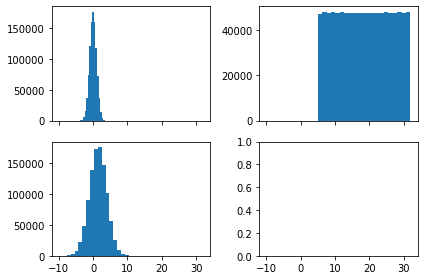

In [ ]:
n_bins = int(np.ceil(1+np.log2(n))) #reglad de sturges bins = 1 + log2(M). M = tamaño de la muestra
figure, axs = plt.subplots(2,2,sharex=True, tight_layout=True)
axs[0][0].hist(dummy_df["A"], bins=n_bins)
axs[1][0].hist(dummy_df["B"], bins=n_bins)
axs[0][1].hist(dummy_df["C"], bins=n_bins)



> **Indexar filas desde n fila**



In [ ]:
df = pd.read_csv("Customer Churn Model.txt")
df.head()

In [ ]:
column_names = df.columns.values.tolist()
a = len(column_names)
a

In [ ]:
df_extra = pd.DataFrame(
    {
        "Column Names"  : column_names,
        "A" : np.random.randn(a),
        "B" : np.random.uniform(0,1,a)
    }, index = range(42,42+a) #index crea el DataFrame desde y hasta la fila que indiquemos
)
df_extra

# ***TRATAMIENTO DATAFRAMES***



> **Agrupación**



In [ ]:
df = pd.read_csv("Customer Churn Model.txt")
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
grouped_State = df.groupby("State")
grouped_State.groups  #devuelve el array ordenado con las filas

{'AK': Int64Index([  36,   38,   95,  138,  181,  282,  339,  350,  353,  505,  550,
              657,  684,  718,  719,  812,  950,  953, 1024, 1054, 1094, 1162,
             1224, 1260, 1342, 1417, 1589, 1682, 1803, 1884, 1987, 2071, 2083,
             2101, 2222, 2265, 2269, 2270, 2367, 2418, 2475, 2571, 2627, 2752,
             2807, 2902, 2929, 3088, 3137, 3236, 3241, 3283],
            dtype='int64'),
 'AL': Int64Index([   5,  112,  135,  169,  219,  239,  272,  278,  288,  326,  332,
              450,  469,  491,  497,  514,  531,  540,  590,  750,  776,  788,
              805,  822,  843,  859,  934,  949,  958, 1015, 1026, 1090, 1104,
             1129, 1131, 1152, 1274, 1428, 1464, 1613, 1661, 1662, 1767, 1780,
             1839, 1902, 2081, 2135, 2155, 2172, 2180, 2212, 2317, 2329, 2334,
             2348, 2446, 2494, 2595, 2601, 2634, 2644, 2699, 2738, 2748, 2749,
             2827, 2845, 2858, 2939, 2992, 3017, 3048, 3058, 3078, 3095, 3128,
             3139, 3180, 3306

In [ ]:
double_group = df.groupby(["Churn?", "VMail Plan"])
double_group.groups

{('False.',
  'no'): Int64Index([   2,    3,    4,    5,    7,    8,   11,   12,   13,   14,
             ...
             3318, 3319, 3321, 3324, 3325, 3326, 3327, 3329, 3330, 3331],
            dtype='int64', length=2008),
 ('False.',
  'yes'): Int64Index([   0,    1,    6,    9,   16,   18,   26,   34,   35,   36,
             ...
             3286, 3297, 3300, 3303, 3305, 3306, 3315, 3316, 3328, 3332],
            dtype='int64', length=842),
 ('True.',
  'no'): Int64Index([  10,   15,   21,   33,   48,   54,   69,   76,   77,   84,
             ...
             3255, 3265, 3268, 3272, 3280, 3301, 3304, 3320, 3322, 3323],
            dtype='int64', length=403),
 ('True.',
  'yes'): Int64Index([  41,   57,  115,  127,  198,  250,  277,  293,  319,  466,  473,
              509,  514,  542,  547,  569,  613,  626,  721,  771,  792,  892,
              944,  966,  968,  977,  987, 1030, 1105, 1136, 1193, 1240, 1254,
             1263, 1269, 1325, 1407, 1435, 1454, 1467, 1493, 1532, 153

In [ ]:
double_group.get_group(("True.", "no")) #ojo que es doble (())

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True.
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True.
48,ID,119,415,398-1294,no,no,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,417-1488,no,no,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True.
3304,IL,71,510,330-7137,yes,no,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True.
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True.
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True.


In [ ]:
for names, groups in double_group:
  print (names)
  print (groups)

('False.', 'no')
     State  Account Length  Area Code  ... Intl Charge CustServ Calls  Churn?
2       NJ             137        415  ...        3.29              0  False.
3       OH              84        408  ...        1.78              2  False.
4       OK              75        415  ...        2.73              3  False.
5       AL             118        510  ...        1.70              0  False.
7       MO             147        415  ...        1.92              0  False.
...    ...             ...        ...  ...         ...            ...     ...
3326    OH              96        415  ...        4.02              1  False.
3327    SC              79        415  ...        3.19              2  False.
3329    WV              68        415  ...        2.59              3  False.
3330    RI              28        510  ...        3.81              2  False.
3331    CT             184        510  ...        1.35              2  False.

[2008 rows x 21 columns]
('False.', 'yes')
   



> **Agregación (Operaciones sobre datos agrupados)**



In [ ]:
double_group.sum()  #acumulado de las combinatorias

Account Length  Area Code  ...  Intl Charge  CustServ Calls
Churn? VMail Plan                             ...                             
False. no                  202284     877954  ...      5511.96            2933
       yes                  84978     367709  ...      2306.74            1199
True.  no                   41210     176140  ...      1154.88             870
       yes                   8377      35326  ...       240.77             207

[4 rows x 16 columns]

In [ ]:
double_group.mean()

Account Length   Area Code  ...  Intl Charge  CustServ Calls
Churn? VMail Plan                              ...                             
False. no              100.739044  437.228088  ...     2.745000        1.460657
       yes             100.923990  436.709026  ...     2.739596        1.423990
True.  no              102.258065  437.071960  ...     2.865707        2.158809
       yes             104.712500  441.575000  ...     3.009625        2.587500

[4 rows x 16 columns]

In [ ]:
double_group.size()

Churn?  VMail Plan
False.  no            2008
        yes            842
True.   no             403
        yes             80
dtype: int64

In [ ]:
double_group.describe()

Account Length                         ... CustServ Calls          
                           count        mean        std  ...            50%  75%  max
Churn? VMail Plan                                        ...                         
False. no                 2008.0  100.739044  40.186010  ...            1.0  2.0  7.0
       yes                 842.0  100.923990  39.172006  ...            1.0  2.0  8.0
True.  no                  403.0  102.258065  40.442981  ...            2.0  4.0  9.0
       yes                  80.0  104.712500  34.289975  ...            2.0  4.0  9.0

[4 rows x 128 columns]

In [ ]:
grouped_DayMins = double_group["Day Mins"]
grouped_DayMins.describe()

count        mean        std  ...     50%      75%    max
Churn? VMail Plan                                 ...                        
False. no          2008.0  173.188147  48.561105  ...  175.70  207.200  310.4
       yes          842.0  179.915796  53.583008  ...  182.10  216.750  315.6
True.  no           403.0  212.934739  70.574627  ...  228.60  269.750  350.8
       yes           80.0  176.585000  50.839290  ...  171.45  209.925  322.4

[4 rows x 8 columns]

In [ ]:
  double_group.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.


In [ ]:
# genera agregados (subtotales) de las columnas que no se incorporan al df.
double_group.aggregate(
    {
        "Eve Calls": np.sum,
        "Night Calls" : np.mean,
        "CustServ Calls" : np.std,
        "Day Calls" : lambda h:(np.mean(h))/np.std(h) #realiza una ecuación a la columna
    }
)

Eve Calls  Night Calls  CustServ Calls  Day Calls
Churn? VMail Plan                                                   
False. no             201073    99.884960        1.154030   5.076133
       yes             84037   100.471496        1.187347   5.040798
True.  no              40494   100.091811        1.813326   4.578116
       yes              8077   101.950000        2.016977   5.511847

In [ ]:
# para realizar una ecuación a todas las columnas: double_group.aggregate([lambda x: np.mean(x) / np.std(x)])



> **Filtrado, Ordenación, Transformación...**



In [ ]:
data = pd.read_csv("usa_states_population.csv")
data.head(5)

,Rank,State,Postal,Population
0,1,Alabama,AL,4849377.0
1,2,Alaska,AK,736732.0
2,3,Arizona,AZ,6731484.0
3,4,Arkansas,AR,2966369.0
4,5,California,CA,38802500.0


In [ ]:
data["Tot %"] = data["Population"]/data["Population"].values.sum()
n = len(data)
data["Age Avrg"] = 45 + 15 * np.random.randn(n)
data["Vote"] = np.random.choice(["Demo", "Republic"], n)
data.head(10)

,Rank,State,Postal,Population,Tot %,Age Avrg,Vote
0,1,Alabama,AL,4849377.0,0.015041,54.072597,Demo
1,2,Alaska,AK,736732.0,0.002285,48.706866,Demo
2,3,Arizona,AZ,6731484.0,0.020879,50.581595,Republic
3,4,Arkansas,AR,2966369.0,0.009201,41.987616,Republic
4,5,California,CA,38802500.0,0.120353,48.416355,Demo
5,6,Colorado,CO,5355866.0,0.016612,44.323454,Demo
6,7,Connecticut,CT,3596677.0,0.011156,58.238802,Republic
7,8,Delaware,DE,935614.0,0.002902,67.005954,Republic
8,9,District of Columbia,DC,658893.0,0.002044,64.610084,Republic
9,10,Florida,FL,19893297.0,0.061703,36.499265,Demo


In [ ]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])
df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [ ]:
test1 = [False, True]
df[test1]

,one,two,three
rabbit,4,5,6


In [ ]:
# select columns by name
df.filter(items=['one', 'three'])

,one,three
mouse,1,3
rabbit,4,6


In [ ]:
# select columns by regular expression
df.filter(regex='e$', axis=1)

,one,three
mouse,1,3
rabbit,4,6


In [ ]:
# select rows containing 'bbi'
df.filter(like='bbi', axis=0)

,one,two,three
rabbit,4,5,6


In [ ]:
zscore = lambda x : (x - x.mean())/x.std()

In [ ]:
z_group = data["Tot %"].transform(zscore)

(array([26., 14.,  6.,  2.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([-0.79503563, -0.25398848,  0.28705867,  0.82810583,  1.36915298,
         1.91020013,  2.45124728,  2.99229443,  3.53334158,  4.07438873,
         4.61543588]),
 <a list of 10 Patch objects>)

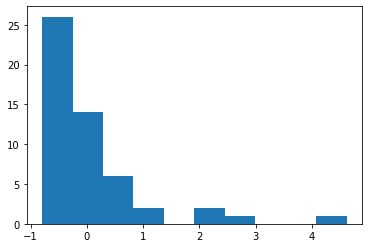

In [ ]:
plt.hist(z_group)

# ***CONJUNTO DE TRAIN / TEST***

In [ ]:
data = pd.read_csv("Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.




> **Dividir según ND**



In [ ]:
a = len(data)
a

3333

(array([ 16.,  78., 256., 665., 874., 834., 412., 155.,  40.,   3.]),
 array([-3.30659335, -2.60448126, -1.90236917, -1.20025708, -0.49814499,
         0.2039671 ,  0.90607918,  1.60819127,  2.31030336,  3.01241545,
         3.71452754]),
 <a list of 10 Patch objects>)

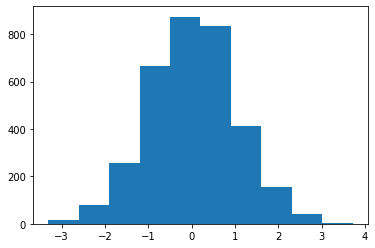

In [ ]:
b = np.random.randn(a)
plt.hist(b)

In [ ]:
check = (b<0.75)
int_check = (b<0.75).astype(int)  #no se puede representar un HIST de un vector booleano sin pasarlo a int
check

array([ True,  True, False, ...,  True, False,  True])

In [ ]:
int_check

array([1, 1, 0, ..., 1, 0, 1])

(array([ 783.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2550.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

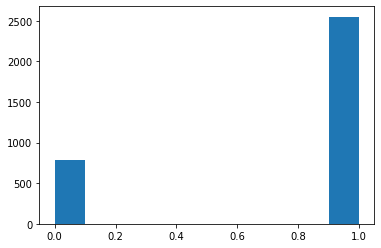

In [ ]:
plt.hist(int_check)

In [ ]:
training = data[check]  #sin hacerlo int!!
testing = data[~check]

In [ ]:
len (training)

2550

In [ ]:
len(test)

667



> **Dividir con sklearn**



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data, test_size = 0.2)

In [ ]:
len (train)

2666

In [ ]:
len (test)

667

In [ ]:
import sklearn

In [ ]:
sklearn.utils.shuffle(data)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
135,AL,91,510,387-2919,yes,no,0,129.9,112,22.08,173.3,83,14.73,247.2,130,11.12,11.2,3,3.02,3,False.
250,OR,33,415,380-2558,no,yes,29,157.4,99,26.76,117.9,80,10.02,279.2,79,12.56,13.9,11,3.75,4,True.
2220,DE,87,415,379-4372,no,no,0,177.2,72,30.12,248.9,105,21.16,200.8,87,9.04,8.6,7,2.32,3,False.
1109,ID,118,415,335-3320,no,no,0,140.4,112,23.87,187.1,60,15.90,207.9,155,9.36,7.9,1,2.13,0,False.
278,AL,131,415,361-7998,no,yes,25,192.7,85,32.76,225.9,105,19.20,254.2,59,11.44,10.9,6,2.94,2,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,LA,93,415,337-9345,no,no,0,179.3,93,30.48,178.6,98,15.18,225.2,131,10.13,11.5,6,3.11,3,False.
1331,OK,101,408,405-1780,no,no,0,209.6,107,35.63,228.8,96,19.45,172.4,85,7.76,7.6,2,2.05,3,False.
3288,SC,78,415,360-3126,no,no,0,109.5,105,18.62,286.1,90,24.32,247.6,113,11.14,4.9,9,1.32,1,False.
2975,WV,80,415,382-3512,no,no,0,151.5,89,25.76,131.7,78,11.19,235.3,131,10.59,11.8,4,3.19,0,False.


In [ ]:
data = sklearn.utils.shuffle(data)
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [ ]:
len (train_data)

2499

In [ ]:
len (test_data)

833

# ***APILAR DATASETS "STACK/SCRAMBLE"***




In [ ]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white_wine = pd.read_csv("winequality-white.csv", sep=";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_data_scramble = pd.concat([red_wine, white_wine], axis = 0) # En python, existen 2 ejes, axis = 0 eje horizontal axis = 1 eje vertical
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7




> **Datos Distribuidos**



In [ ]:
data = pd.read_csv("001.csv") #importar el 1º fichero para generar el df 

In [ ]:
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [ ]:
data = pd.read_csv("001.csv")
final_length = len(data)

for i in range(2,333):
    if i < 10:
        filename = "00" + str(i)
    if 10 <= i < 100:
        filename = "0" + str(i)
    if i >= 100:
        filename = str(i)
    file = filename + ".csv"
    
    temp_data = pd.read_csv(file)
    final_length += len(temp_data)
    
    data = pd.concat([data, temp_data], axis = 0)

In [ ]:
data.shape

(772087, 4)

In [ ]:
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [ ]:
final_length == data.shape[0] #check todas las filas se han cargado

True

# ***JOIN DATASETS***

In [ ]:
data_main = pd.read_csv("Medals.csv", encoding="ISO-8859-1")

In [ ]:
data_main.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [ ]:
len(data_main)

8618

In [ ]:
data_country = pd.read_csv("Athelete_Country_Map.csv", encoding = "ISO-8859-1")
data_country.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [ ]:
len(data_country)

6970

In [ ]:
data_sports = pd.read_csv("Athelete_Sports_Map.csv", encoding="ISO-8859-1")
data_sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [ ]:
len(data_sports)

6975



> **Merge**



In [ ]:
data_country_dp = data_country.drop_duplicates(subset="Athlete")  #quitar duplicados para no duplicar con merge filas con ambos países del mismo atleta

In [ ]:
data_main_country = pd.merge(left= data_main, right=data_country_dp, left_on= "Athlete", right_on="Athlete")
data_main_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [ ]:
data_sports_dp = data_sports.drop_duplicates(subset="Athlete")

In [ ]:
data_final = pd.merge(left= data_main_country, right= data_sports_dp, left_on= "Athlete", right_on= "Athlete")
data_final.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming




> **JOIN (INNER / LEFT / RIGHT / OUTER)**



# ***ESTADÍSTICOS DESCRIPTIVOS***

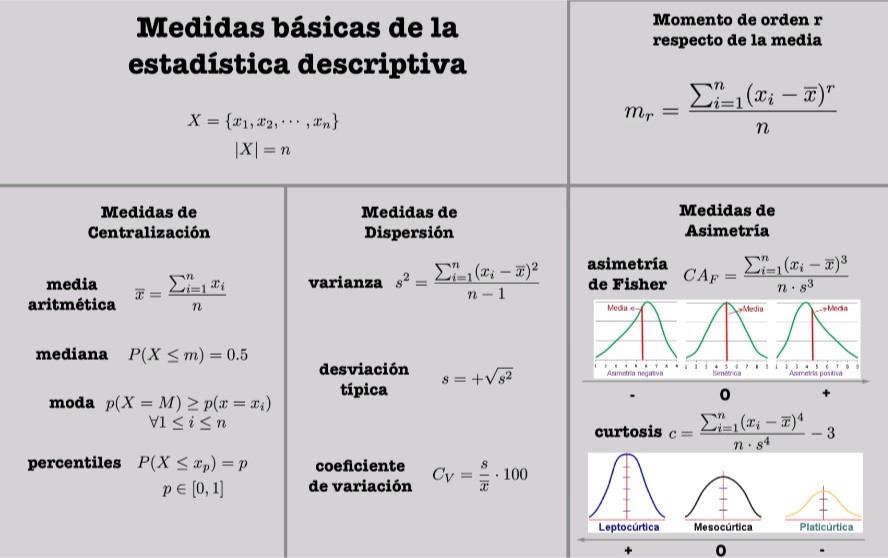

In [ ]:
random.seed(0)
dataA = random.sample(range(100000), 60)
dataA

[50494,
 99346,
 55125,
 5306,
 33936,
 67013,
 63691,
 53075,
 39755,
 62468,
 46930,
 76465,
 28631,
 66150,
 18254,
 36941,
 18316,
 99064,
 12429,
 81050,
 32834,
 69804,
 92428,
 78892,
 19262,
 40651,
 12945,
 95660,
 9665,
 89651,
 43279,
 61884,
 73375,
 13199,
 46372,
 56907,
 41444,
 80070,
 83941,
 26801,
 72420,
 62522,
 58024,
 68334,
 34143,
 8163,
 71919,
 1840,
 12225,
 94333,
 52274,
 93094,
 87576,
 81954,
 149,
 80202,
 64694,
 43664,
 31969,
 95719]

In [ ]:
mean = np.mean(dataA)
mean

53312.01666666667

In [ ]:
median = np.median(dataA)
median

56016.0

In [ ]:
mode = sp.mode(dataA)
mode

ModeResult(mode=array([149]), count=array([1]))

In [ ]:
percent25 = np.percentile(dataA,25) #si pusieses 0 sería el mínimo o 1 el máximo ya que el percentil 0 es el nro que no tiene nada debajo p=0
percent25

32617.75

In [ ]:
variance = np.var(dataA)  #s^2 = varianza
variance

810711216.7830557

In [ ]:
std = np.std(dataA) #desviación típica s = standard deviation
std

28472.991005215023

In [ ]:
cv = std/mean #coeficiente de variabilidad (variabilidad relativa entre media y std)
cv

0.5340820472660482

In [ ]:
skewness = sp.skew(dataA) # =0 equilibrada >0 chepa a izq de media <0 chepa a derecha de media
skewness

-0.17284864155126514

In [ ]:
curtosis = sp.kurtosis(dataA) # =0 mesocúrtica >0 leptocúrtica(chepuda) <0 platicúrtica(aplanada)
curtosis

-1.0800693127939995

(array([5., 7., 2., 6., 6., 6., 8., 6., 6., 8.]),
 array([  149. , 10068.7, 19988.4, 29908.1, 39827.8, 49747.5, 59667.2,
        69586.9, 79506.6, 89426.3, 99346. ]),
 <a list of 10 Patch objects>)

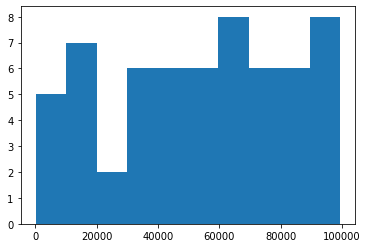

In [ ]:
plt.hist(dataA)



## **Teorema Central del Límite**

*El teorema central del límite (TCL) es una teoría estadística que establece que, dada una muestra suficientemente grande (superior a 30) de la población, la **distribución de las medias muestrales seguirá una distribución normal**.*

*La media poblacional y la media muestral serán iguales. Es decir, **la media de la distribución de todas las medias muestrales será igual a la media del total de la población**.*

***La varianza de la distribución de las medias muestrales será σ²/n***. *Que es la varianza de la población dividido entre el tamaño de la muestra.*

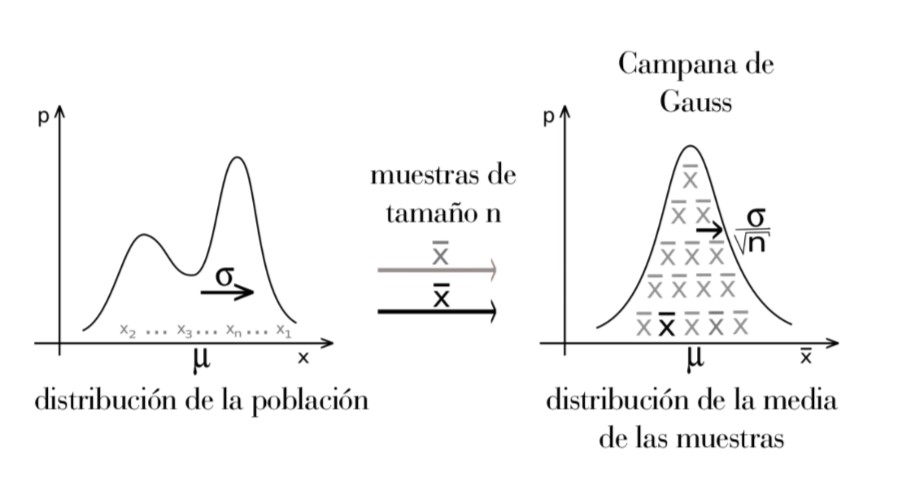



## **Contrastes de Hipótesis**



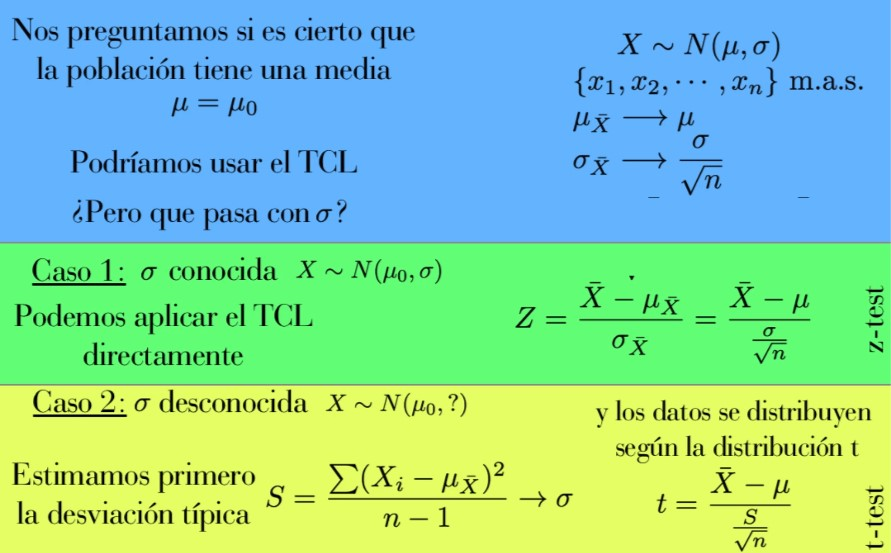



## **p-valor**



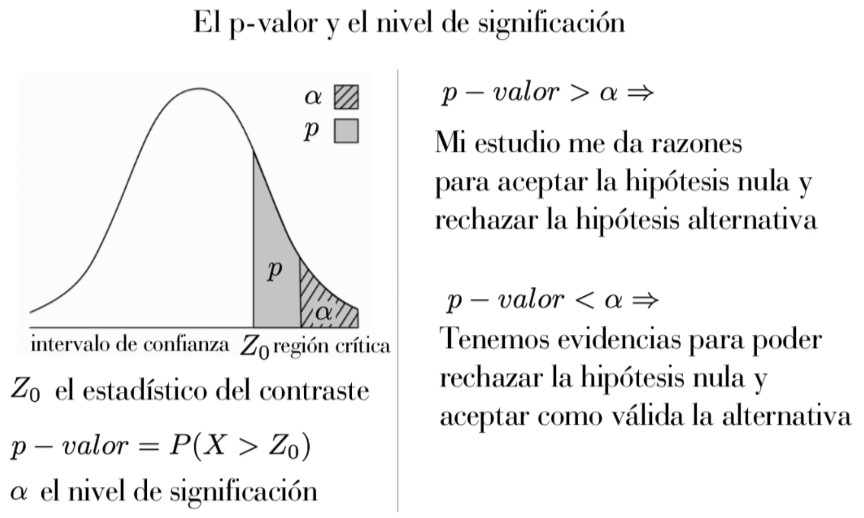

In [ ]:
#Ejemplo JUST-EAT
#Un pizzero afirma que entrega las pizzas de media en 20min (mu) +-3min(std)
# HIPOTESIS NULA: mu <= 20
# HIPOTESIS ALT:  mu > 20 (COLA POR LA DERECHA al ser hipot alt mayor que)
mu = 20
std = 3
#Como conocemos std => z-test
#Hacemos un muestreo de 64 pedidos y conseguimos una media muestral de 21,2min
n = 64
mu_muest = 21.2
Z = (mu_muest - mu)/(std/math.sqrt(n))
Z

3.199999999999998

In [ ]:
alpha = 0.05  #nivel de significación #nivel de confianza = 1-alpha = 95%

In [ ]:
p_value = 1 - sp.norm(0,1).cdf(Z) # Como es cola por la derecha, la cdf(Z) = 1-p_valor
p_value

0.0006871379379158604

In [ ]:
p_value > alpha 
# si True => hipot nula OK 
# si False => hipot nula NOK

False

## **Test Chi-Cuadrado**



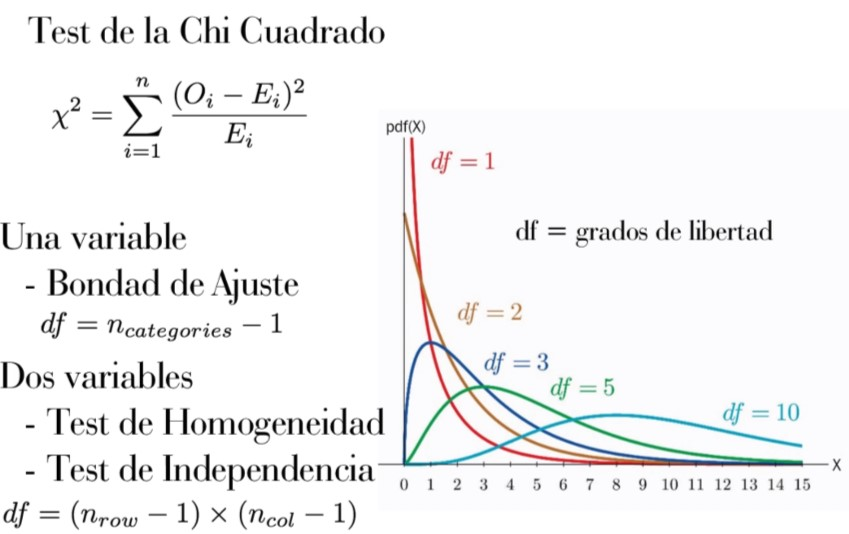

## **Correlación entre variables**

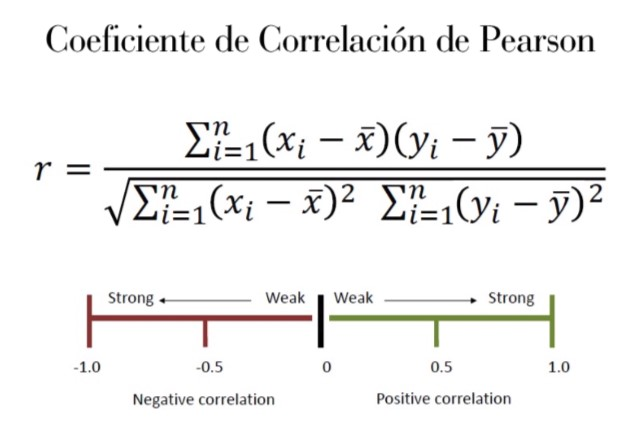

In [ ]:
data_ads = pd.read_csv("Advertising.csv")
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
len(data_ads)

200

In [ ]:
def corr_coeff(df, var1, var2): #creamos una función que calcule el coeficiente de correlación entre 2 var
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [ ]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [ ]:
cols = data_ads.columns.values
for x in cols:
    for y in cols:
        print(x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
TV, corrn : -0.0011216033233262073
TV, corr1 : -0.07879735036509569
TV, corr2 : -0.04435683271077501
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Radio, corrn : 0.003367194224496663
Radio, corr1 : 0.1085768694522202
Radio, corr2 : 0.28933391270094067
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Newspaper, corrn : 0.004654495262249754
Newspaper, corr1 : 0.5503385875778577
Newspaper, corr2 : 0.45100034081887913
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0
Sales, corrn : 0.03435823617756815
Sales, corr1 : 0.3226857579432848
Sales, corr2 : 0.3391108854965276
corrn, TV : 0.002251660616088983
corrn, Radio : 0.013091062391317217
corrn, 

In [ ]:
data_ads1 = pd.read_csv("Advertising.csv")
data_ads1.corr()  #función que te muestra la matriz de correlaciones directamente

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

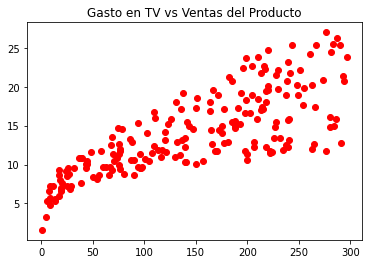

In [ ]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")

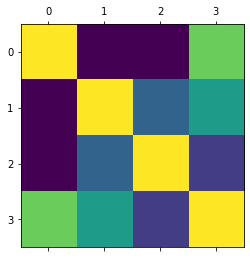

In [ ]:
plt.matshow(data_ads1.corr())